In [1]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Data Analysis

In [2]:
# Load Dataset
data = pd.read_csv("twitter_raw_data/raw_twitter_politikus_2022_2022_05_21.csv")

In [3]:
# Statistics about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27025 entries, 0 to 27024
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     27025 non-null  object 
 1   user_created_time      27023 non-null  object 
 2   user                   27023 non-null  object 
 3   user_description       22096 non-null  object 
 4   user_followers_count   27022 non-null  object 
 5   user_profile_location  16341 non-null  object 
 6   tweet_geo_loc          2 non-null      object 
 7   tweets                 27021 non-null  object 
 8   likes                  27021 non-null  float64
 9   time                   27021 non-null  object 
dtypes: float64(1), object(9)
memory usage: 2.1+ MB


In [4]:
# Get first 5 rows
data.head()

,id,user_created_time,user,user_description,user_followers_count,user_profile_location,tweet_geo_loc,tweets,likes,time
0,361645099,Thu Aug 25 03:13:42 +0000 2011,AndPhillipMassa,#ChelseaFCFans #DRAGON 1 🐲🐉 #MesejPendekUntukA...,483,"Kuching,Malaysia.",NaN,WORLDCHAMPIONSHIP POPDEYEL GUANFRIN AJARJIAN X...,1.0,2022-05-20 07:40:13+00:00
1,911488155722936320,Sat Sep 23 07:11:25 +0000 2017,aizuddin_anuar,"🇲🇾 | Always learning | Writer, Teacher, Resear...",1433,"Oxford, England",NaN,RT @naratifmalaysia: Ucapan belasungkawa keata...,0.0,2022-05-19 02:00:57+00:00
2,257765390,Sat Feb 26 03:39:32 +0000 2011,HIFZHAN_ANUAR,NaN,273,Terengganu/Kelantan,NaN,RT @jentikhati: Doa Supaya Tak Tinggal Solat :...,0.0,2022-05-18 09:38:49+00:00
3,911488155722936320,Sat Sep 23 07:11:25 +0000 2017,aizuddin_anuar,"🇲🇾 | Always learning | Writer, Teacher, Resear...",1433,"Oxford, England",NaN,Saddened to hear about the passing of Malaysia...,23.0,2022-05-18 04:34:35+00:00
4,911488155722936320,Sat Sep 23 07:11:25 +0000 2017,aizuddin_anuar,"🇲🇾 | Always learning | Writer, Teacher, Resear...",1433,"Oxford, England",NaN,RT @Antid_Oto7: One of the great Malaysian Ant...,0.0,2022-05-18 04:25:31+00:00


In [5]:
# Plot for Percentage of data from different locations
def data_source(feature, title, df, size):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127474 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ACER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127486 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ACER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127474 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ACER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127486 missing from current font.
  font.set_text(s

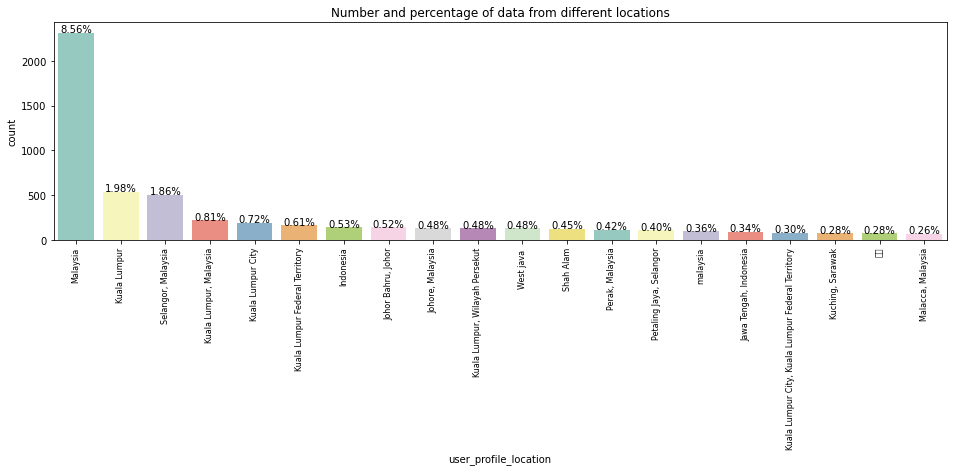

In [6]:
# Percentage of data from different locations
data_source("user_profile_location", "data from different locations", data, 4)

In [7]:
# Count the number of users
count_user =  data.groupby('user')['user'].count()
print(count_user)

user
00000q7            1
00__k00            1
019383pqowie       1
01ADONiS01         1
01ahmetdonmez01    1
                  ..
zzahir1978         1
zzddnn             4
zzulfashah         1
zzxrxdxhs          1
zzzzaaahhid        2
Name: user, Length: 14863, dtype: int64
